# **Week 1: Mean/Covariance of a data set and effect of a linear transformation**

In this week, we are going to investigate how the mean and (co)variance of a dataset changes when we apply affine transformation to the dataset.


# **Learning objectives**

1.   Get Farmiliar with basic programming using Python and Numpy/Scipy.
2.   Learn to appreciate implementing functions to compute statistics of dataset in vectorized way.
1.   Understand the effects of affine transformations on a dataset.
2.   Understand the importance of testing in programming for machine learning.


First, let's import the packages that we will use for the week

In [1]:
# PACKAGE: DO NOT EDIT
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_olivetti_faces
import time
import timeit

In [2]:
%matplotlib inline
from ipywidgets import interact

Next, we are going to retrieve Olivetti faces dataset.

When working with some datasets, before digging into further analysis, it is almost always useful to do a few things to understand your dataset. First of all, answer the following set of questions:

1.   What is the size of your dataset?
2.   What is the dimensionality of your data?

The dataset we have are usually stored as 2D matrices, then it would be really important to know which dimension represents the dimension of the dataset, and which represents the data points in the dataset.

**When you implement the functions for your assignment, make sure you read the docstring for what each dimension of your inputs represents the data points, and which represents the dimensions of the dataset!**


In [3]:
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces(data_home='./')
faces = dataset.data

print('Shape of the faces dataset: {}'.format(faces.shape))
print('{} data points'.format(faces.shape[0]))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to ./
Shape of the faces dataset: (400, 4096)
400 data points


When your dataset are images, it's a really good idea to see what they look like.

One very convenient tool in Jupyter is the interact widget, which we use to visualize the images (faces). For more information on how to use interact, have a look at the documentation [here](http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html).

In [4]:
def show_face(face):
    plt.figure()
    plt.imshow(face.reshape((64, 64)), cmap='gray')
    plt.show()

In [5]:
@interact(n=(0, len(faces)-1))
def display_faces(n=0):
    plt.figure()
    plt.imshow(faces[n].reshape((64, 64)), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=399), Output()), _dom_classes=('widget-interact'…

# **1. Mean and Covariance of a Dataset**


In [6]:
def mean_naive(X):
    """Compute the mean for a dataset by iterating over the dataset
    
    Arguments
    ---------
    X: (N, D) ndarray representing the dataset.
    
    Returns
    -------
    mean: (D, ) ndarray which is the mean of the dataset.
    """
    N, D = X.shape
    
    mean = np.zeros(D)
    for n in range(N):
        for i in range(D):
            mean[i] = mean[i] + X[n, i]
    
    mean = mean/N
        
    return mean

# ===YOU SHOULD EDIT THIS FUNCTION===
def cov_naive(X):
    """Compute the covariance for a dataset
    Arguments
    ---------
    X: (N, D) ndarray representing the dataset.
    
    Returns
    -------
    covariance: (D, D) ndarray which is the covariance matrix of the dataset.
    
    """
    N, D = X.shape
    covariance = np.zeros((D, D))
    mat = np.zeros((N, D))
    mean = mean_naive(X)
    for i in range(N):
        mat[i] = X[i,:] - mean
    for i in range(D):
        for j in range(D):
            covariance[i, j] = covariance[i, j] + mat[:,i]@mat[:,j]
    return covariance/N

In [7]:
mean_naive(faces)

array([0.4001343 , 0.43423554, 0.47628099, ..., 0.32141529, 0.31364669,
       0.31045455])

In [8]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

# ===YOU SHOULD EDIT THIS FUNCTION===
def mean(X):
    """Compute the mean for a dataset
    
    Arguments
    ---------
    X: (N, D) ndarray representing the dataset.
    
    Returns
    -------
    mean: (D, ) ndarray which is the mean of the dataset.
    """
    mean = np.mean(X, axis = 0) # EDIT THIS
    return mean
 
# ===YOU SHOULD EDIT THIS FUNCTION===
def cov(X):
    """Compute the covariance for a dataset
    Arguments
    ---------
    X: (N, D) ndarray representing the dataset.
    
    Returns
    -------
    covariance_matrix: (D, D) ndarray which is the covariance matrix of the dataset.
    
    """
    # It is possible to vectorize our code for computing the covariance, i.e. we do not need to explicitly
    # iterate over the entire dataset as looping in Python tends to be slow
    N, D = X.shape
    covariance_matrix = np.cov(X, rowvar=False, bias=True) # EDIT THIS
    return covariance_matrix

In [9]:
mean(faces)

array([0.40013435, 0.43423545, 0.4762809 , ..., 0.32141536, 0.3136469 ,
       0.31045464], dtype=float32)

In [10]:
cov(faces)

array([[ 0.03256897,  0.03221722,  0.02860266, ..., -0.00627397,
        -0.00599633, -0.00466273],
       [ 0.03221722,  0.03582188,  0.03403026, ..., -0.00892454,
        -0.00845002, -0.0067429 ],
       [ 0.02860266,  0.03403026,  0.03782977, ..., -0.0121586 ,
        -0.0113095 , -0.00946599],
       ...,
       [-0.00627397, -0.00892454, -0.0121586 , ...,  0.03519637,
         0.03136033,  0.02796677],
       [-0.00599633, -0.00845002, -0.0113095 , ...,  0.03136033,
         0.03363069,  0.03122917],
       [-0.00466273, -0.0067429 , -0.00946599, ...,  0.02796677,
         0.03122917,  0.03254727]])

In [11]:
X = np.random.randn(100, 5)
cov(X)

array([[ 1.08567687,  0.01792721, -0.03388004,  0.11939484,  0.01432917],
       [ 0.01792721,  0.97535479,  0.14808611,  0.10434311, -0.02611379],
       [-0.03388004,  0.14808611,  0.9395391 ,  0.12000943, -0.08078757],
       [ 0.11939484,  0.10434311,  0.12000943,  1.04318497, -0.17943156],
       [ 0.01432917, -0.02611379, -0.08078757, -0.17943156,  0.92381347]])

In [12]:
cov_naive(X)

array([[ 1.08567687,  0.01792721, -0.03388004,  0.11939484,  0.01432917],
       [ 0.01792721,  0.97535479,  0.14808611,  0.10434311, -0.02611379],
       [-0.03388004,  0.14808611,  0.9395391 ,  0.12000943, -0.08078757],
       [ 0.11939484,  0.10434311,  0.12000943,  1.04318497, -0.17943156],
       [ 0.01432917, -0.02611379, -0.08078757, -0.17943156,  0.92381347]])

With the mean function implemented, let's take a look at the mean face of our dataset!

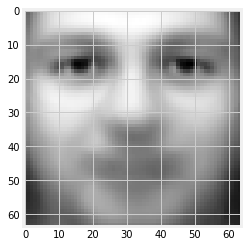

In [13]:
def mean_face(faces):
    """Compute the mean of the `faces`
    
    Arguments
    ---------
    faces: (N, 64 * 64) ndarray representing the faces dataset.
    
    Returns
    -------
    mean_face: (64, 64) ndarray which is the mean of the faces.
    """
    mean_face = mean(faces)
    return mean_face

plt.imshow(mean_face(faces).reshape((64, 64)), cmap='gray');

One of the advantage of writing vectorized code is speedup gained when working on larger dataset. Loops in Python are slow, and most of the time you want to utilise the fast native code provided by Numpy without explicitly using for loops. To put things into perspective, we can benchmark the two different implementation with the %time function in the following way:

In [14]:
# We have some huge data matrix, and we want to compute its mean
X = np.random.randn(100000, 20)
# Benchmarking time for computing mean
%time mean_naive(X)
%time mean(X)
pass

CPU times: user 1.02 s, sys: 1.72 ms, total: 1.02 s
Wall time: 1.02 s
CPU times: user 3.01 ms, sys: 0 ns, total: 3.01 ms
Wall time: 3.02 ms


In [15]:
# Benchmarking time for computing covariance
%time cov_naive(X)
%time cov(X)
pass

CPU times: user 1.71 s, sys: 33.8 ms, total: 1.74 s
Wall time: 1.47 s
CPU times: user 25.7 ms, sys: 16 ms, total: 41.7 ms
Wall time: 20.9 ms


Alternatively, we can also see how running time increases as we increase the size of our dataset. In the following cell, we run mean, mean_naive and cov, cov_naive for many times on different sizes of the dataset and collect their running time. If you are less familiar with Python, you may want to spend some time understanding what the code does. Understanding how your code scales with the size of your dataset (or dimensionality of the dataset) is crucial when you want to apply your algorithm to larger dataset. This is really important when we propose alternative methods a more efficient algorithms to solve the same problem. We will use these techniques again later in this course to analyze the running time of our code.

In [16]:
def time(f, repeat=100):
    """A helper function to time the execution of a function.
    
    Arguments
    ---------
    f: a function which we want to time it.
    repeat: the number of times we want to execute `f`
    
    Returns
    -------
    the mean and standard deviation of the execution.
    """
    times = []
    for _ in range(repeat):
        start = timeit.default_timer()
        f()
        stop = timeit.default_timer()
        times.append(stop-start)
    return np.mean(times), np.std(times)

In [17]:
fast_time = []
slow_time = []

for size in np.arange(100, 5000, step=100):
    X = np.random.randn(size, 20)
    f = lambda : mean(X)
    mu, sigma = time(f)
    fast_time.append((size, mu, sigma))
    
    f = lambda : mean_naive(X)
    mu, sigma = time(f)
    slow_time.append((size, mu, sigma))

fast_time = np.array(fast_time)
slow_time = np.array(slow_time)

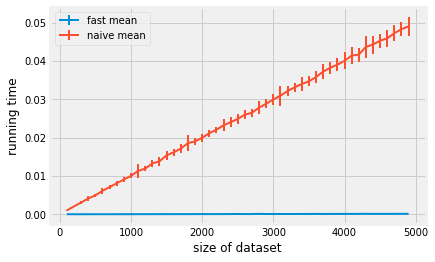

In [18]:
fig, ax = plt.subplots()
ax.errorbar(fast_time[:,0], fast_time[:,1], fast_time[:,2], label='fast mean', linewidth=2)
ax.errorbar(slow_time[:,0], slow_time[:,1], slow_time[:,2], label='naive mean', linewidth=2)
ax.set_xlabel('size of dataset')
ax.set_ylabel('running time')
plt.legend();

In [19]:
## === FILL IN THIS, follow the approach we have above ===
fast_time_cov = []
slow_time_cov = []
for size in np.arange(100, 5000, step=100):
    X = np.random.randn(size, 20)
    f = lambda : cov(X)               # EDIT THIS
    mu, sigma = time(f) # EDIT THIS
    fast_time_cov.append((size, mu, sigma))
    
    f = lambda :cov_naive(X)        # EDIT THIS
    mu, sigma = time(f) # EDIT THIS
    slow_time_cov.append((size, mu, sigma))

fast_time_cov = np.array(fast_time_cov)
slow_time_cov = np.array(slow_time_cov)

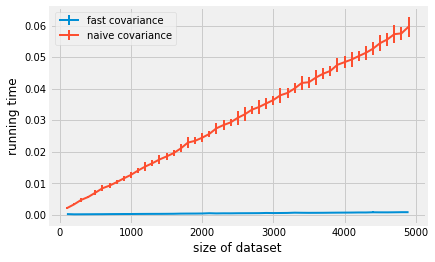

In [20]:
fig, ax = plt.subplots()
ax.errorbar(fast_time_cov[:,0], fast_time_cov[:,1], fast_time_cov[:,2], label='fast covariance', linewidth=2)
ax.errorbar(slow_time_cov[:,0], slow_time_cov[:,1], slow_time_cov[:,2], label='naive covariance', linewidth=2)
ax.set_xlabel('size of dataset')
ax.set_ylabel('running time')
plt.legend();

# **2. Affine Transformation of Dataset**
In this week we are also going to verify a few properties about the mean and covariance of affine transformation of random variables.

Consider a data matrix  𝑋  of size (N, D). We would like to know what is the covariance when we apply affine transformation  𝐴𝑥𝑖+𝑏  for each datapoint  𝑥𝑖  in  𝑋 . i.e. we would like to know what happens to the mean and covariance for the new dataset if we apply affine transformation.

In [21]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

# ===YOU SHOULD EDIT THIS FUNCTION===
def affine_mean(mean, A, b):
    """Compute the mean after affine transformation
    Args:
        mean: ndarray, the mean vector
        A, b: affine transformation applied to x
    Returns:
        mean vector after affine transformation
    """
    affine_m = np.zeros(mean.shape) # EDIT THIS
    affine_m = A@mean + b
    return affine_m

# ===YOU SHOULD EDIT THIS FUNCTION===
def affine_covariance(S, A, b):
    """Compute the covariance matrix after affine transformation
    Args:
        S: ndarray, the covariance matrix
        A, b: affine transformation applied to each element in X        
    Returns:
        covariance matrix after the transformation
    """
    affine_cov = np.zeros(S.shape) # EDIT THIS
    affine_cov = A@S@A.T
    return affine_cov

Once the two functions above are implemented, we can verify the correctness our implementation. Assuming that we have some  𝐴  and  𝑏 

In [22]:
random = np.random.RandomState(42)
A = random.randn(4,4)
b = random.randn(4)

Next we can generate some random dataset  𝑋

In [23]:
X = random.randn(100, 4)

Assuming that for some dataset  𝑋 , the mean and covariance are  𝑚 ,  𝑆 , and for the new dataset after affine transformation  𝑋′ , the mean and covariance are  𝑚′  and  𝑆′ , then we would have the following identity:



> 𝑚′=affine_mean(𝑚,𝐴,𝑏)


> 𝑆′=affine_covariance(𝑆,𝐴,𝑏)





In [24]:
X1 = ((A @ (X.T)).T + b)  # applying affine transformation once
X2 = ((A @ (X1.T)).T + b) # and again

In [25]:
np.testing.assert_almost_equal(mean(X1), affine_mean(mean(X), A, b))
np.testing.assert_almost_equal(cov(X1),  affine_covariance(cov(X), A, b))
print('correct')

correct


In [26]:
np.testing.assert_almost_equal(mean(X2), affine_mean(mean(X1), A, b))
np.testing.assert_almost_equal(cov(X2),  affine_covariance(cov(X1), A, b))
print('correct')

correct


One very useful way to compare whether arrays are equal/similar is use the helper functions in numpy.testing.

Check the Numpy [documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.testing.html) for details.

If you are interested in learning more about floating point arithmetic, here is a good [paper](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.22.6768).